In [2]:
%pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 8.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 8.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 8.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 8.1 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   -- ------------------------------------- 1.8/36.3 MB 8.6 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/36.3 MB 8.4 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/36.3 MB 8.4 MB/s eta 0:00:04
   ------- -------------------------------- 6.8/36.3 MB 8.3 MB/s eta 0:00:04
   --------- ------------------------------ 8.7/36.3 MB 8.3 MB/s eta 0:00:04
   ----------- ---------------------------- 10.2/36.3 MB 8.3 MB/s eta 0:00:04
   ------------- ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn
print(sklearn.__version__)

1.8.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [5]:
df = pd.read_csv("../data/Telco_customer_churn.csv")

In [6]:
drop_cols = [
    "Customer ID",
    "City",
    "Zip Code",
    "Lat Long",
    "Latitude",
    "Longitude",
    "Churn Label",
    "Churn Reason"
]

df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [7]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())


In [8]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


In [9]:
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_prob))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1035
           1       0.82      0.84      0.83       374

    accuracy                           0.91      1409
   macro avg       0.88      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409

ROC-AUC Score: 0.9663359942132321


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_prob))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1035
           1       0.86      0.88      0.87       374

    accuracy                           0.93      1409
   macro avg       0.91      0.92      0.91      1409
weighted avg       0.93      0.93      0.93      1409

ROC-AUC Score: 0.9781433258415356


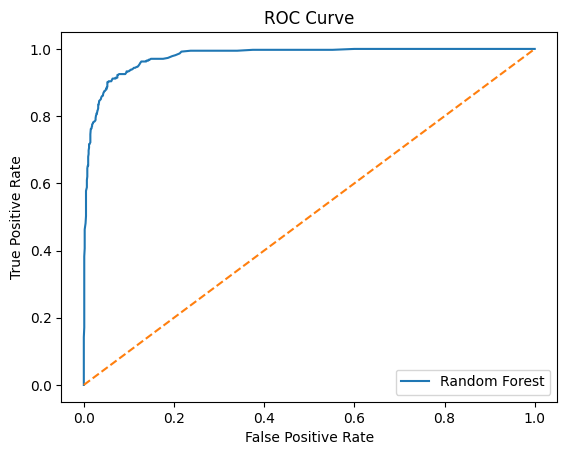

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, rf_prob)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

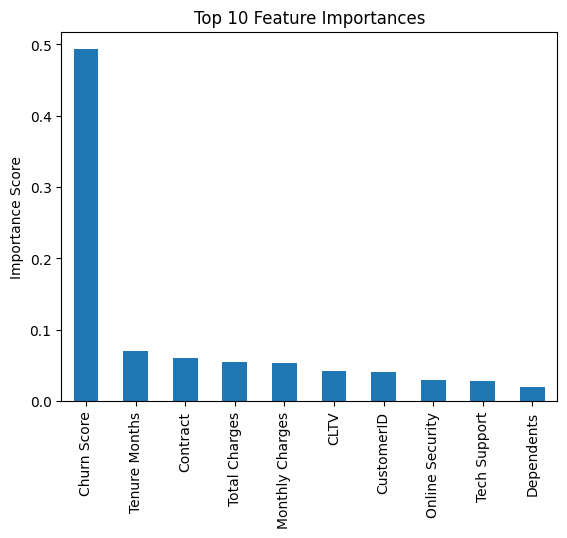

In [17]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

# Plot
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()
